In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

In [2]:
# pie chart parameters
overall_ratios = [0.27, 0.56, 0.17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]

# bar chart parameters
age_ratios = [0.33, 0.54, 0.07, 0.06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = 0.2

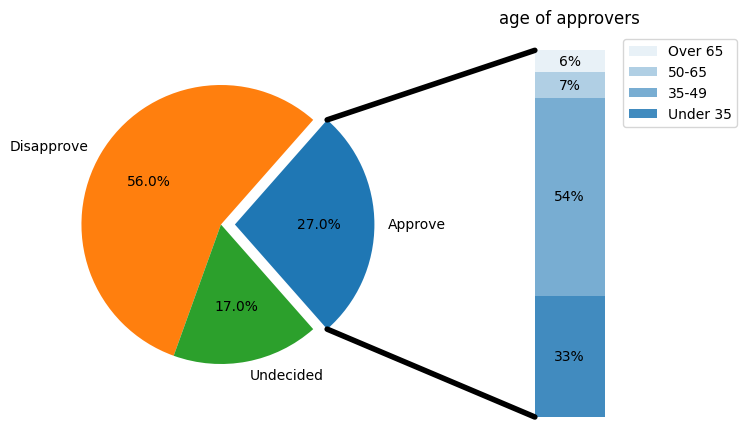

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

wedges, *_ = ax1.pie(
    overall_ratios, autopct="%1.1f%%",
    startangle=angle, labels=labels, explode=explode,
)

for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(
        0, height, width, bottom=bottom, color="C0",
        label=label, alpha=0.1 + 0.25 * j,
    )
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type="center")

ax2.set_title("age of approvers")
ax2.legend()
ax2.axis("off")
ax2.set_xlim(-2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(
    xyA=(-width / 2, bar_height), coordsA=ax2.transData,
    xyB=(x, y), coordsB=ax1.transData,
)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
    xyA=(-width / 2, 0), coordsA=ax2.transData,
    xyB=(x, y), coordsB=ax1.transData,
)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()